In [1]:
!pip install texthero

     |████████████████████████████████| 1.4MB 7.5MB/s 
     |████████████████████████████████| 245kB 21.2MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=73f1a94c1691594974f53e07906c7e2716922939b160b9d1531d7a1a6296b702
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import texthero as hero
from texthero import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
cols = ['EventDescription', 'IncidentCause', 'IncidentConsequence', 'FailedAssets','Category','ActionTaken', 'Locality']

In [5]:
df = pd.read_csv('/content/cleaned_incidents1 (1).csv', usecols = cols)
df = df.dropna()
df

,ActionTaken,EventDescription,FailedAssets,IncidentCause,IncidentConsequence,Locality,Category
0,Crew isolated supply and undertook repairs,A nearby customer reported sparking of electri...,Conductor (ABC),HVABC cable faulted midspan,Grassfire,Paraparap,OH Cable
1,Crew undertook repairs,A contractor reported that he had contacted an...,No failed asset,Contractor contacted earthing conductor,No Go Zone (contact),Ravenhall,Dug up
2,Crew isolated supply and undertook repairs,A field crew attending an outage found that a ...,Conductor (bare),Conductor broke due to rust,Serious risk to public safety (e.g. live condu...,Peterborough,Connection
3,Crew undertook repairs,Interfere and vandalism in substation. Unknown...,Indoor,Vandalism,Loss of supply;Damage to network assets,South Melbourne,Other
4,Crew isolated supply and undertook repairs,A nearby customer reported that a high load ha...,Service conductor,Unknown high load contacted LV service cable,No Go Zone (contact);Damage to network assets,Whittington,Vehicle
...,...,...,...,...,...,...,...
6499,The crew replaced a 3 phase FOLCB on the pole,A report came in to UE of a FMB sparking at 31...,Connection box,The likely cause was determined by EIO to be a...,Plant/equipment,Brighton,Connection
6500,Conductor repaired at point of contact.,Report received from a resident to advise that...,Conductor (bare),Crane struck line,No Go Zone (contact);Damage to network assets,Mount Wallace,Vehicle
6501,On arrival crew isolated supply and arranged p...,Report received of pole fire at incident locat...,Pole (wood),Excessive leakage current,Pole-top fire,Ouyen,Pole
6502,On arrival crew isolated supply and carried ou...,A customer called to report a tractor had hit ...,Conductor (bare);Pole (wood),Farm equipment hit pole,Damage to network assets,Ultima,Vehicle


In [6]:
df['description'] = df['EventDescription'] + ' ' + df['IncidentCause']+ ' ' + df['IncidentConsequence'] + ' ' + df['FailedAssets']

In [7]:
df['description']

0       A nearby customer reported sparking of electri...
1       A contractor reported that he had contacted an...
2       A field crew attending an outage found that a ...
3       Interfere and vandalism in substation. Unknown...
4       A nearby customer reported that a high load ha...
                              ...                        
6499    A report came in to UE of a FMB sparking at 31...
6500    Report received from a resident to advise that...
6501    Report received of pole fire at incident locat...
6502    A customer called to report a tractor had hit ...
6503    concrete electrical cover outside of front of ...
Name: description, Length: 6443, dtype: object

In [8]:
df['description'] = hero.clean(df['description'])

In [9]:
df['description']

0       nearby customer reported sparking electrical l...
1       contractor reported contacted earthing cable e...
2       field crew attending outage found 22kv conduct...
3       interfere vandalism substation unknown third p...
4       nearby customer reported high load pulled wire...
                              ...                        
6499    report came ue fmb sparking st kilda st bright...
6500    report received resident advise crane made con...
6501    report received pole fire incident location ar...
6502    customer called report tractor hit wire brough...
6503    concrete electrical cover outside front house ...
Name: description, Length: 6443, dtype: object

In [10]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1), min_df=10,use_idf= True) #using only unigrams for tfidf
tf_idf_vect.fit(df['description'])
#print(tf_idf_vect.get_feature_names()[0:10])
final_tf_idf = tf_idf_vect.transform(df['description'])

Number of components = 4 and explained variance = 0.09562249172136413
Number of components = 10 and explained variance = 0.18182939626130448
Number of components = 15 and explained variance = 0.2209375567725207
Number of components = 20 and explained variance = 0.25157824213042984
Number of components = 50 and explained variance = 0.3634768993934761
Number of components = 100 and explained variance = 0.4686431687261403
Number of components = 150 and explained variance = 0.5423486691596155
Number of components = 200 and explained variance = 0.5989702253267595
Number of components = 500 and explained variance = 0.7935399415721373
Number of components = 700 and explained variance = 0.863019623312239
Number of components = 800 and explained variance = 0.8890593866369161
Number of components = 900 and explained variance = 0.9108395292399586
Number of components = 1000 and explained variance = 0.9292031209523132
Number of components = 1500 and explained variance = 0.9844508863474423


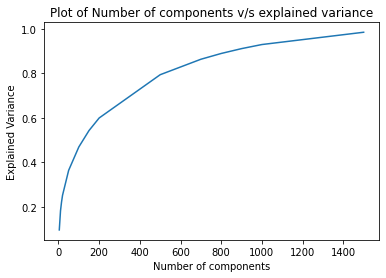

In [11]:
n_comp = [4,10,15,20,50,100,150,200,500,700,800,900,1000,1500] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(final_tf_idf)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [ ]:
#1500 features can explain 98% of the dataset

In [12]:
svd = TruncatedSVD(n_components=1500, random_state=42)
#svd.fit(final_tf_idf)

In [13]:
final = svd.fit_transform(final_tf_idf)

In [14]:
print(final)

[[ 1.92050005e-01 -3.33063720e-02 -2.33067717e-02 ...  6.04605206e-03
  -9.41795898e-03 -3.81685641e-04]
 [ 2.42293846e-01 -1.70036945e-01 -1.64762441e-01 ...  8.95916969e-03
   1.29283520e-02  1.80077364e-03]
 [ 2.72963843e-01 -1.13425852e-01 -6.94526142e-02 ... -6.04048762e-03
  -3.66260795e-03 -1.27069584e-02]
 ...
 [ 6.34797966e-01  3.96145469e-01  6.47623920e-02 ...  2.33403377e-03
  -8.20386108e-04 -2.19067739e-03]
 [ 2.67008819e-01 -1.96210016e-02 -2.11784263e-02 ...  4.17841213e-03
  -5.28308981e-03 -3.97911345e-04]
 [ 7.42630610e-02 -1.31248766e-01  9.14928650e-02 ...  2.79584121e-04
  -2.49298586e-04 -6.26167641e-03]]


In [15]:
final.shape

(6443, 1500)

In [16]:
le = LabelEncoder()
Y = le.fit_transform(df['Category'])

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final,Y, 
                                                    test_size=0.25, random_state=4, stratify = Y)

In [18]:
svc = SVC(C=1.0, kernel = 'linear', probability = True)
svc.fit(x_train, y_train)
accuracy = accuracy_score(y_test,svc.predict(x_test))
print(accuracy)

0.8336436995654872


#Implementing LR with LSA dataset

In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
LR=LogisticRegression(random_state=0)
LR.fit(x_train, y_train)
accuracy = accuracy_score(y_test,LR.predict(x_test))
print(accuracy)

0.8342644320297952
